In [1]:
import sys
sys.path.append("../../..")

import helper as hlp
import pandas as pd
import numpy as np

[nltk_data] Downloading package stopwords to C:\Users\Abdul
[nltk_data]     Manaf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
EPOCHS = 50
MAX_LEN = 30
N_CLASSES = 5
BATCH_SIZE = 128
LEARNING_RATE = 2e-5
NAME = 'mBert(bert)-urdu'
MODEL_NAME = 'bert-base-multilingual-uncased'
dir = '../../../../Dataset Statistics/dataset'
path = f'../saved_models/{NAME}'
class_names = ['Disability', 'Gender/Sexual', 'Origin/Nationality', 'Race/Ethnicity', 'Religion']

In [3]:
train_df = pd.read_csv(f'{dir}/train.csv')
val_df = pd.read_csv(f'{dir}/val.csv')
test_df = pd.read_csv(f'{dir}/test.csv')

train_df = train_df[train_df['class'] != 0]
val_df = val_df[val_df['class'] != 0]
test_df = test_df[test_df['class'] != 0]

train_texts = train_df['urdu_text'].values
val_texts = val_df['urdu_text'].values
test_texts = test_df['urdu_text'].values

train_labels = train_df[class_names].values
val_labels = val_df[class_names].values
test_labels = test_df[class_names].values

In [4]:
#show 5 values along with their labels
for i in range(5):
    print(train_texts[i], train_labels[i])

آپ کو کس نے لہروں میں لہر بنانی ہے؟ [0 0 0 1 0]
وہ کتیا بالکل ٹھیک لگ رہا ہے. [0 1 0 0 0]
ہم اب سارے پلیٹ فارم پر، تو اگلی بار جب آپ ایک بری کتیا کے ساتھ ایک خوبصورت عورت سے رابطہ کرتے ہیں، جو آپ کو پسند ہے، وہ آپ کو مختلف طریقے سے بتا سکتے ہیں [0 1 0 0 0]
صرف ایک بال کی گولی مل گئی، کسی نے مجھے میری کتیا سے لے سکتا ہے [0 1 0 0 0]
@ReallyVirtual-اسای ٹی وی پی ٹی کے مطابق اگر تمام Y ایسا محسوس کرتا ہے کہ وہ ایسا کر سکتے ہیں. اس وقت کیا کر سکتے ہیں. [0 0 0 1 0]


In [5]:
#show 5 values along with their labels
for i in range(5):
    print(hlp.preprocess_text(train_texts[i], language="urdu")
    , train_labels[i])

آپ کو کس نے لہروں میں لہر بنانی ہے؟ [0 0 0 1 0]
وہ کتیا بالکل لگ رہا [0 1 0 0 0]
ہم اب سارے پلیٹ فارم پر، اگلی بار جب آپ بری کتیا ساتھ خوبصورت عورت سے رابطہ ہیں، جو آپ کو پسند ہے، وہ آپ کو مختلف سے بتا سکتے [0 1 0 0 0]
صرف بال گولی مل گئی، کسی نے مجھے میری کتیا سے سکتا [0 1 0 0 0]
reallyvirtualاسای ٹی وی پی ٹی مطابق اگر تمام y ایسا محسوس کرتا وہ ایسا کر سکتے اس وقت کیا کر سکتے [0 0 0 1 0]


In [6]:
## apply preprocessing to all texts
train_texts = [hlp.preprocess_text(text, language="urdu") for text in train_texts]
val_texts = [hlp.preprocess_text(text, language="urdu") for text in val_texts]
test_texts = [hlp.preprocess_text(text, language="urdu") for text in test_texts]

In [7]:
## mbert model and tokenizer
import torch
from transformers import BertTokenizer, BertForSequenceClassification

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)
model = BertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=N_CLASSES)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
model = model.to(device)

c:\Users\Abdul Manaf\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\utils\_runtime.py:184: UserWarning: Pydantic is installed but cannot be imported. Please check your installation. `huggingface_hub` will default to not using Pydantic. Error message: '{e}'
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [8]:
train_data_loader = hlp.create_data_loader(train_texts, train_labels, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = hlp.create_data_loader(val_texts, val_labels, tokenizer, MAX_LEN, BATCH_SIZE)

history = hlp.train_model_multi(train_data_loader, val_data_loader, model, optimizer, device, EPOCHS, tokenizer, path)

Epoch 0/50
----------


Training Progress: 100%|██████████| 241/241 [01:25<00:00,  2.81it/s, loss=0.228]


Train loss 0.30173352057755737 accuracy 0.4814369310793238
Validation loss 0.24049415834891943 accuracy 0.6422859371952409
Model and tokenizer saved at epoch 0
Checkpoint saved: Improved validation accuracy at epoch 0: 0.6422859371952409
Epoch 1/50
----------


Training Progress: 100%|██████████| 241/241 [01:24<00:00,  2.84it/s, loss=0.202]


Train loss 0.23334940779505925 accuracy 0.6526332899869961
Validation loss 0.2311485512757007 accuracy 0.6881217086015213
Model and tokenizer saved at epoch 1
Checkpoint saved: Improved validation accuracy at epoch 1: 0.6881217086015213
Epoch 2/50
----------


Training Progress: 100%|██████████| 241/241 [01:24<00:00,  2.84it/s, loss=0.193]


Train loss 0.21496201488981603 accuracy 0.6987321196358908
Validation loss 0.23805322488884867 accuracy 0.6847084064755218
No improvement in validation accuracy for 1 epochs.
Epoch 3/50
----------


Training Progress: 100%|██████████| 241/241 [01:27<00:00,  2.77it/s, loss=0.109]


Train loss 0.19693305405220055 accuracy 0.736963589076723
Validation loss 0.2538964358376868 accuracy 0.6850984981470646
No improvement in validation accuracy for 2 epochs.
Epoch 4/50
----------


Training Progress: 100%|██████████| 241/241 [01:27<00:00,  2.76it/s, loss=0.0948]


Train loss 0.17898041609659235 accuracy 0.7732119635890767
Validation loss 0.2662807279898797 accuracy 0.6917300565632923
Model and tokenizer saved at epoch 4
Checkpoint saved: Improved validation accuracy at epoch 4: 0.6917300565632923
Epoch 5/50
----------


Training Progress: 100%|██████████| 241/241 [01:25<00:00,  2.81it/s, loss=0.0663]


Train loss 0.15979341024927085 accuracy 0.8059492847854356
Validation loss 0.2801234814119928 accuracy 0.6918275794811781
Model and tokenizer saved at epoch 5
Checkpoint saved: Improved validation accuracy at epoch 5: 0.6918275794811781
Epoch 6/50
----------


Training Progress: 100%|██████████| 241/241 [01:26<00:00,  2.80it/s, loss=0.0408]


Train loss 0.14196792311379028 accuracy 0.8347854356306892
Validation loss 0.29956652371235837 accuracy 0.7077238150965477
Model and tokenizer saved at epoch 6
Checkpoint saved: Improved validation accuracy at epoch 6: 0.7077238150965477
Epoch 7/50
----------


Training Progress: 100%|██████████| 241/241 [01:26<00:00,  2.78it/s, loss=0.0395]


Train loss 0.1298180491165007 accuracy 0.8534460338101431
Validation loss 0.3018253215669114 accuracy 0.7074312463428906
No improvement in validation accuracy for 1 epochs.
Epoch 8/50
----------


Training Progress: 100%|██████████| 241/241 [01:25<00:00,  2.83it/s, loss=0.021] 


Train loss 0.11762853602867156 accuracy 0.8665474642392718
Validation loss 0.31061856154306433 accuracy 0.6985566608152916
No improvement in validation accuracy for 2 epochs.
Epoch 9/50
----------


Training Progress: 100%|██████████| 241/241 [01:24<00:00,  2.85it/s, loss=0.0139]


Train loss 0.10187588268852332 accuracy 0.8905396618985696
Validation loss 0.35260189094661193 accuracy 0.6824653793641505
No improvement in validation accuracy for 3 epochs.
Epoch 10/50
----------


Training Progress: 100%|██████████| 241/241 [01:24<00:00,  2.84it/s, loss=0.0204]


Train loss 0.08735768644610628 accuracy 0.9081599479843954
Validation loss 0.3425218321291017 accuracy 0.6908523503023211
No improvement in validation accuracy for 4 epochs.
Epoch 11/50
----------


Training Progress: 100%|██████████| 241/241 [01:24<00:00,  2.84it/s, loss=0.0101]


Train loss 0.07729532006988882 accuracy 0.9189206762028609
Validation loss 0.36425715979234674 accuracy 0.6995318899941486
No improvement in validation accuracy for 5 epochs.
Stopping early due to lack of improvement in validation accuracy.


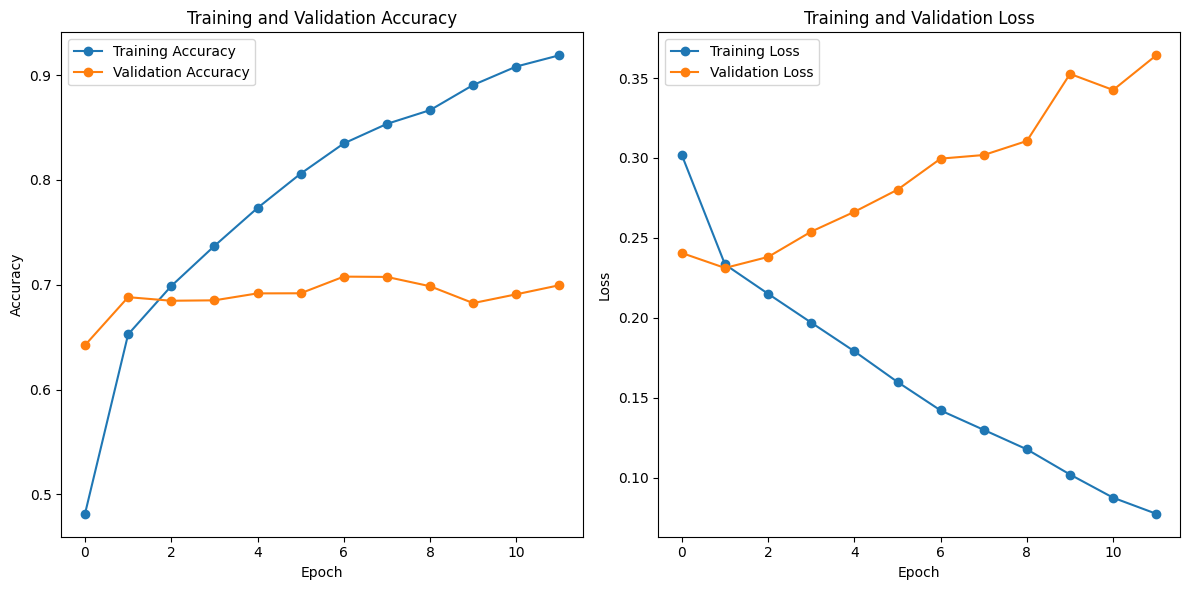

In [9]:
hlp.plot_history(history)

In [10]:
test_data_loader = hlp.create_data_loader(test_texts, test_labels, tokenizer, MAX_LEN, BATCH_SIZE)

test_acc, test_loss, test_label_actual, test_label_pred = hlp.eval_model_multi(model, test_data_loader, device)

print(f'Test Accuracy: {test_acc:.2f} Test Loss: {test_loss}')

Test Accuracy: 0.68 Test Loss: 0.38152396044245473


Accuracy: 0.69
F1 Score: 0.68
Precision: 0.68
Recall: 0.69

Classification Report:
                    precision    recall  f1-score   support

        Disability       0.10      0.02      0.03       354
     Gender/Sexual       0.61      0.69      0.64      3059
Origin/Nationality       0.15      0.49      0.23        41
    Race/Ethnicity       0.67      0.61      0.64      3776
          Religion       0.82      0.86      0.84      3024

          accuracy                           0.69     10254
         macro avg       0.47      0.53      0.48     10254
      weighted avg       0.68      0.69      0.68     10254



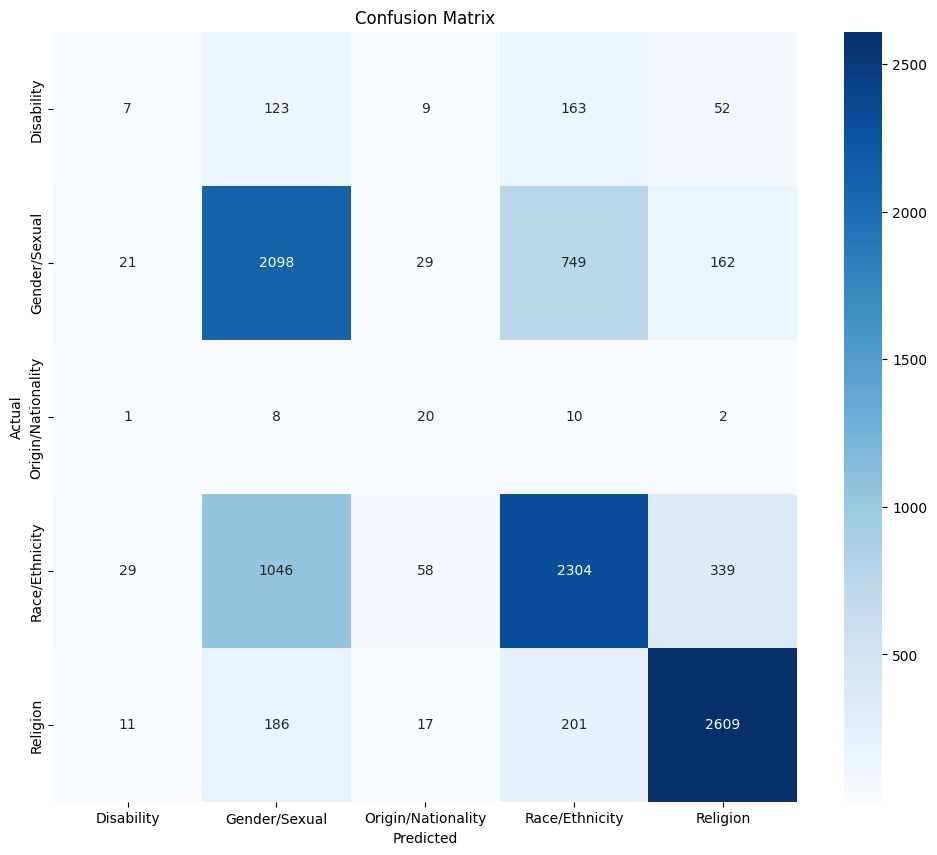

In [11]:
hlp.plot_confusion_matrix(np.argmax(test_label_actual, axis=1), np.argmax(test_label_pred, axis=1), class_names)

In [12]:
test_texts = ["This is the sort of thing that happens in a shithole country. @URL"]
preds, confidence = hlp.predict(test_texts, model, tokenizer, MAX_LEN, device)

index = list(confidence[0]).index(np.array(confidence[0]).max())

print(f"The predicted class is: {class_names[index]} with confidence: {confidence[0][index]:.2f}")

The predicted class is: Race/Ethnicity with confidence: 0.93
